100%|██████████| 170M/170M [00:31<00:00, 5.43MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


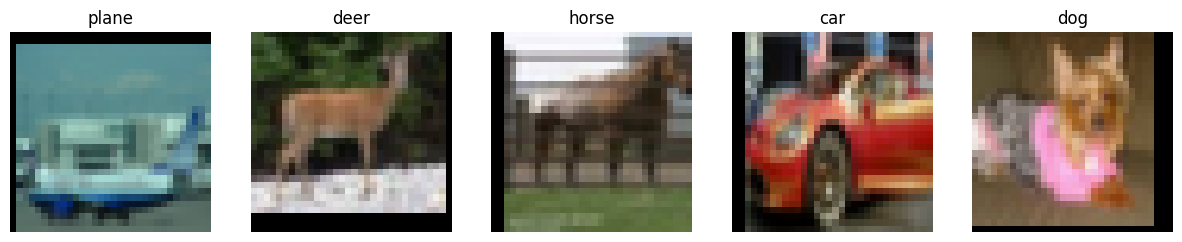

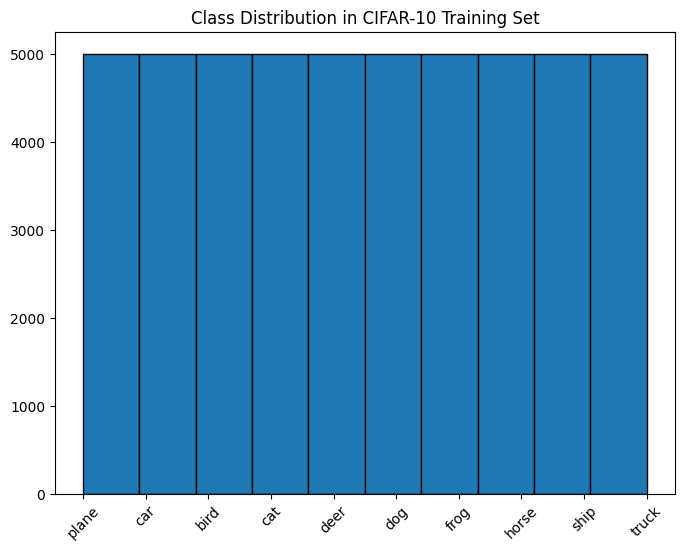

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from src.preprocess import load_cifar10_data

# Create figures/ directory at project root
os.makedirs('../figures', exist_ok=True)

# Load data
trainloader, _, classes = load_cifar10_data()

# Visualize sample images
dataiter = iter(trainloader)
images, labels = next(dataiter)

def imshow(img):
    img = img * 0.5 + 0.5  # Denormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    imshow(images[i])
    plt.title(classes[labels[i]])
plt.savefig('../figures/sample_images.png')
plt.show()

# Class distribution
all_labels = []
for _, labels in trainloader:
    all_labels.extend(labels.numpy())
plt.figure(figsize=(8, 6))
plt.hist(all_labels, bins=10, edgecolor='black')
plt.xticks(range(10), classes, rotation=45)
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.savefig('../figures/class_distribution.png')
plt.show()